# Feature selection techniques

As a data scientist or machine learning enthusiast, you know that building an accurate and efficient machine learning model is no small feat. By selecting the most relevant and informative features from your dataset, you can significantly improve the accuracy and efficiency of your model. That's where feature selection comes in. It's one of the several ways to improve your machine learning models, in addition to feature engineering, hyperparameter tuning, regularisation and data preprocessing.


**Feature selection** is the process of selecting the most relevant and informative features from your dataset. As the old saying goes, "garbage in, garbage out" - if your dataset contains irrelevant or noisy features, your model's performance will suffer, no matter how good your algorithm or hyperparameters are.

**This notebook covers:**
1. Filter methods
2. Wrapper methods
3. Embedded methods

These are applied to the breast cancer dataset - however a different dataset can also be used. 

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LassoCV
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Read data and pre-process (Breast Cancer Dataset)

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Create a dataframe with the data and column names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

# Prepare input features and target
X = df.drop(columns=['target'])
y = df['target']

# Scale the dataset
scaler = scaler = MinMaxScaler()
scaler.fit(X)  
X_scaled = pd.DataFrame(scaler.transform(X), columns=data.feature_names)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,0.122999,0.050154,0.087783,0.038449,0.027396,0.038243,0.102653,0.044949,0.110400,0.076096,0.037353,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
124,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,0.174179,0.018975,0.172339,0.021957,0.014677,0.142979,0.228678,0.125177,0.196628,0.059070,0.109904,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,0.157414,0.254332,0.190265,0.079657,0.280892,0.376934,0.133283,0.299299,0.262397,0.157166,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
195,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,0.141323,0.029947,0.121199,0.034679,0.016713,0.121868,0.102277,0.058611,0.159500,0.149828,0.043434,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
545,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,0.169545,0.084918,0.215656,0.061678,0.045645,0.141245,0.140731,0.051035,0.171699,0.182755,0.058324,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,0.839090,0.150172,0.108734,0.113603,0.034811,0.526804,0.686664,0.143207,0.334533,0.246637,0.726725,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,0.320977,0.070433,0.286598,0.065872,0.025809,0.232077,0.156578,0.074369,0.264823,0.109304,0.101751,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,0.080034,0.006772,0.079473,0.004095,0.007411,0.060475,0.010950,0.012187,0.068346,0.105223,0.016797,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,0.326032,0.039580,0.131078,0.039815,0.022503,0.122412,0.117598,0.055177,0.181228,0.061181,0.067410,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


### 

# Fit base model

## Logistic Regression

In [3]:
def fit_logistic_reg(X_train, y_train, X_test, y_test):
    """
    Fits a linear regression model on the training data and evaluates it on the test data using mean squared error (MSE),
    root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2).

    Args:
    - X_train (numpy.ndarray): The training data features.
    - y_train (numpy.ndarray): The training data target.
    - X_test (numpy.ndarray): The test data features.
    - y_test (numpy.ndarray): The test data target.

    Returns:
    - None: The function prints the MSE, RMSE, MAE, and R2 values to the console.
    """

    # Instantiate a linear regression model
    model = LogisticRegression(max_iter=1000)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the performance metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

    return model

In [4]:
# reg = fit_logistic_reg(X_train, y_train, X_test, y_test)
reg = fit_logistic_reg(X_train, y_train, X_test, y_test)

Accuracy: 0.9766081871345029
Precision: 0.9642857142857143
Recall: 1.0
F1-score: 0.9818181818181818


## Define function to plot feature importances
We will use this in the below techniques

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_importances(df_in, title):
  """make a horizontal bar chart of feature importances"""

  # Plot the feature importances in sorted order
  # Set plot style
  plt.style.use('seaborn-darkgrid')

  # Create horizontal bar plot
  sns.set_style('whitegrid')
  cmap = sns.color_palette('rocket_r', as_cmap=True)
  fig, ax = plt.subplots(figsize=(7, 9))
  sns.barplot(x='Importance', y='Feature', data=df_in, orient='h')
  ax.set_title(title, fontsize=16)
  ax.set_xlabel('Importance Scores', fontsize=12)
  ax.set_ylabel('Features', fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=12)
  ax.invert_yaxis()
  plt.show()
  

# 1. Filter methods

## Pearson correlation

Pearson correlation feature selection measures the linear relationship between features and the target variable. This technique is useful for identifying important features in regression problems where the target variable is continuous. The correlation coefficient is used to measure the strength and direction of the linear relationship. However, Pearson correlation assumes a linear relationship and may miss non-linear relationships or complex interactions between features.

**Pros:**
- Measures the linear relationship between features and the target variable
- Can identify both positive and negative correlations
- Relatively easy to interpret and explain

**Cons:**
- Assumes a linear relationship between features and the target variable
- May miss non-linear relationships between features and the target variable
- Does not capture complex interactions between features

Selected features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26280\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


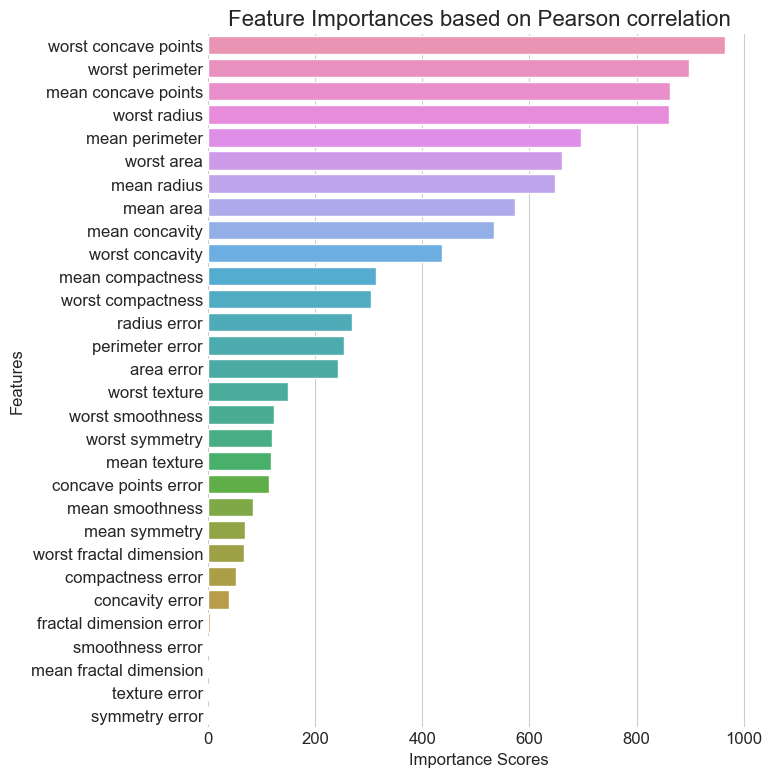

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
149,0.319892,0.306337,0.187275,0.067502,0.066054,0.263607,0.232980,0.132889,0.124920,0.206838
124,0.302381,0.292378,0.173913,0.189597,0.139165,0.225187,0.207082,0.109836,0.264217,0.308522
421,0.364854,0.376132,0.217434,0.339738,0.313121,0.303451,0.317197,0.153362,0.257109,0.380756
195,0.280610,0.267708,0.158176,0.090745,0.118141,0.211668,0.201205,0.102094,0.140895,0.282990
545,0.314213,0.299910,0.182269,0.069681,0.121421,0.263963,0.234922,0.133848,0.083786,0.246529


In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply Pearson correlation feature selection to select the top two features
selector = SelectKBest(f_regression, k=10)
X_filter = selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
X_train_corr = X_train.loc[:,mask]
X_test_corr = X_test.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances and plot
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)
print("Selected features:", new_features)
plot_importances(feature_importances, 'Feature Importances based on Pearson correlation')

X_train_corr.head()


## Chi-squared

C:\Users\hjurz\AppData\Local\Temp\ipykernel_26280\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


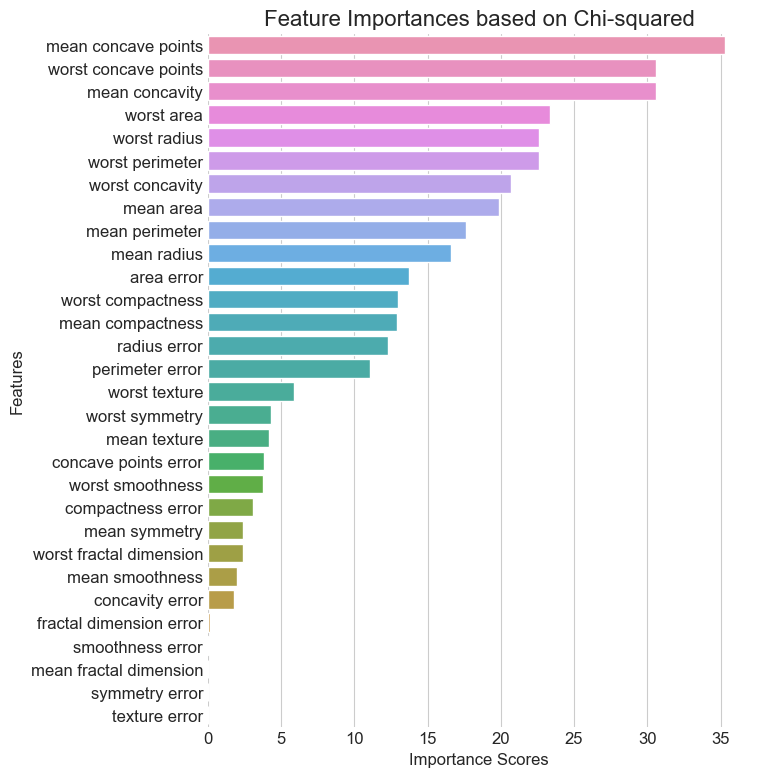

Selected features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
149,0.319892,0.306337,0.187275,0.067502,0.066054,0.263607,0.232980,0.132889,0.124920,0.206838
124,0.302381,0.292378,0.173913,0.189597,0.139165,0.225187,0.207082,0.109836,0.264217,0.308522
421,0.364854,0.376132,0.217434,0.339738,0.313121,0.303451,0.317197,0.153362,0.257109,0.380756
195,0.280610,0.267708,0.158176,0.090745,0.118141,0.211668,0.201205,0.102094,0.140895,0.282990
545,0.314213,0.299910,0.182269,0.069681,0.121421,0.263963,0.234922,0.133848,0.083786,0.246529


In [7]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-squared feature selection to select the top five features
selector = SelectKBest(chi2, k=10)
X_filter = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
X_train_chi = X_train.loc[:,mask]
X_test_chi = X_test.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances and plot
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)
plot_importances(feature_importances, 'Feature Importances based on Chi-squared')

print("Selected features:", new_features)

X_train_chi.head()

## ANOVA

C:\Users\hjurz\AppData\Local\Temp\ipykernel_26280\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


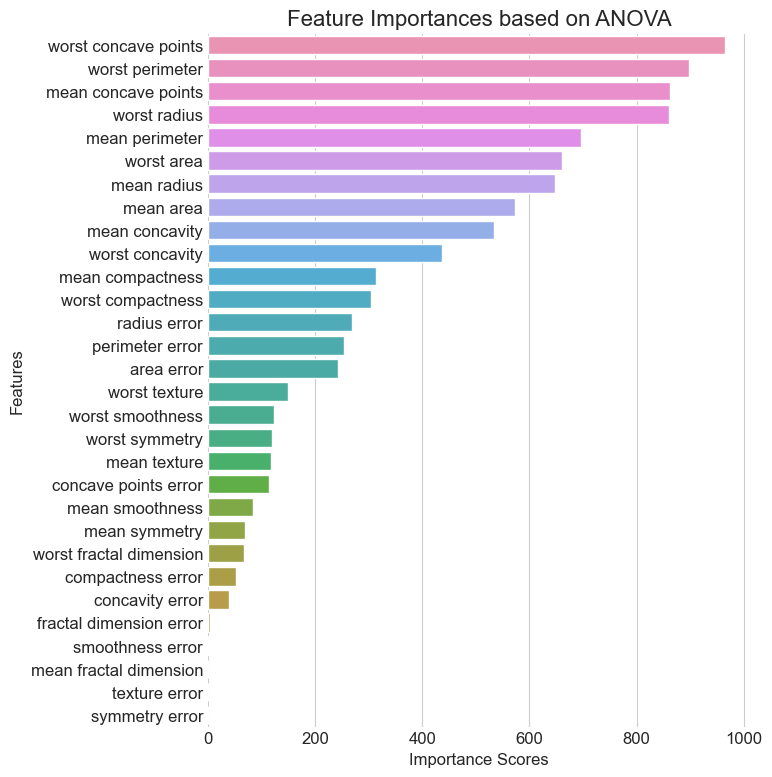

Selected features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


,mean radius,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points
149,0.319892,0.306337,0.187275,0.067502,0.066054,0.263607,0.232980,0.132889,0.124920,0.206838
124,0.302381,0.292378,0.173913,0.189597,0.139165,0.225187,0.207082,0.109836,0.264217,0.308522
421,0.364854,0.376132,0.217434,0.339738,0.313121,0.303451,0.317197,0.153362,0.257109,0.380756
195,0.280610,0.267708,0.158176,0.090745,0.118141,0.211668,0.201205,0.102094,0.140895,0.282990
545,0.314213,0.299910,0.182269,0.069681,0.121421,0.263963,0.234922,0.133848,0.083786,0.246529


In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA F-test feature selection to select the top two features
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
X_train_anova = X_train.loc[:,mask]
X_test_anova = X_test.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances and plot
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)
plot_importances(feature_importances, 'Feature Importances based on ANOVA')

print("Selected features:", new_features)

X_train_anova.head()

### Test linear regression using selscted features

In [9]:
print("\nFeature selection by Pearson Correlation:")
reg = fit_logistic_reg(X_train_corr, y_train, X_test_corr, y_test)

print("\nFeature selection by Chi-squared:")
reg = fit_logistic_reg(X_train_chi, y_train, X_test_chi, y_test)

print("\nFeature selection by ANOVA:")
reg = fit_logistic_reg(X_train_anova, y_train, X_test_anova, y_test)


Feature selection by Pearson Correlation:
Accuracy: 0.9415204678362573
Precision: 0.9375
Recall: 0.9722222222222222
F1-score: 0.9545454545454546

Feature selection by Chi-squared:
Accuracy: 0.9415204678362573
Precision: 0.9375
Recall: 0.9722222222222222
F1-score: 0.9545454545454546

Feature selection by ANOVA:
Accuracy: 0.9415204678362573
Precision: 0.9375
Recall: 0.9722222222222222
F1-score: 0.9545454545454546


In [10]:
# print("\nFeature selection by Pearson Correlation:")
# reg = fit_logistic_reg(X_train_corr, y_train, X_test_corr, y_test)

# print("\nFeature selection by Chi-squared:")
# reg = fit_logistic_reg(X_train_chi, y_train, X_test_chi, y_test)

# print("\nFeature selection by ANOVA:")
# reg = fit_logistic_reg(X_train_anova, y_train, X_test_anova, y_test)

# 2. Wrapper methods

## Recursive feature elimination (RFE)

Selected features:
Index(['mean radius', 'mean perimeter', 'mean concave points', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points'],
      dtype='object')


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26280\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


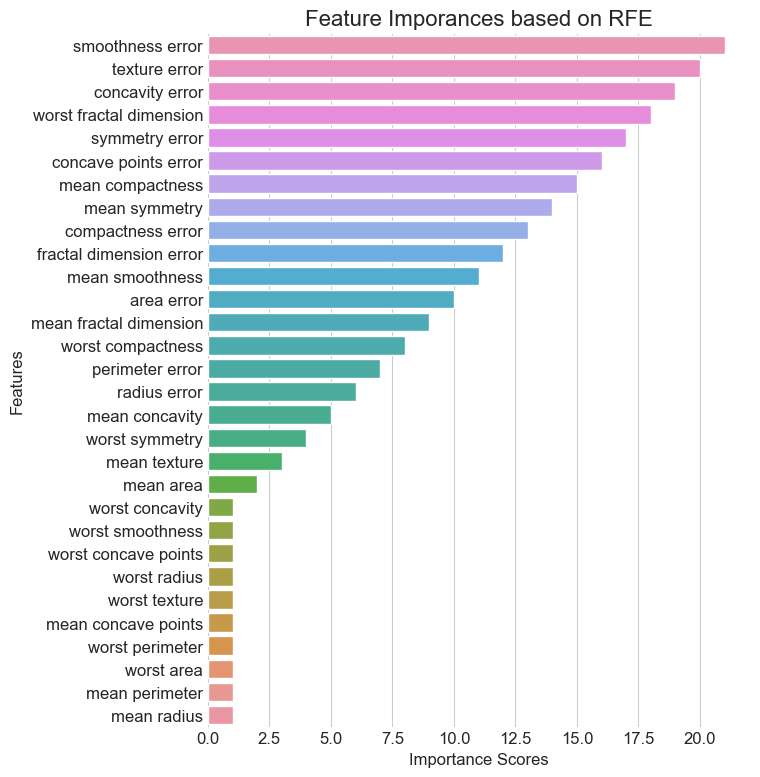

,mean radius,mean perimeter,mean concave points,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst concave points
149,0.319892,0.306337,0.066054,0.263607,0.278252,0.232980,0.132889,0.171300,0.124920,0.206838
124,0.302381,0.292378,0.139165,0.225187,0.285981,0.207082,0.109836,0.206894,0.264217,0.308522
421,0.364854,0.376132,0.313121,0.303451,0.168443,0.317197,0.153362,0.396421,0.257109,0.380756
195,0.280610,0.267708,0.118141,0.211668,0.265991,0.201205,0.102094,0.254441,0.140895,0.282990
545,0.314213,0.299910,0.121421,0.263963,0.454957,0.234922,0.133848,0.333025,0.083786,0.246529
...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.103656,0.142744,0.064141,0.097281,0.060511,0.024381,0.327082,0.114537,0.164467
106,0.220503,0.216847,0.173211,0.185343,0.459488,0.174810,0.082703,0.644720,0.229473,0.418557
270,0.345923,0.321401,0.031064,0.248310,0.230011,0.219284,0.122739,0.095754,0.030879,0.114536
435,0.331251,0.327068,0.321223,0.324084,0.500533,0.316201,0.168133,0.595192,0.325000,0.627835


In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a model object 
model = LogisticRegression()

# Create a Recursive Feature Elimination object
rfe = RFE(estimator=model, n_features_to_select=10, step=1)

# Fit the RFE object to the data
rfe.fit(X_train, y_train.values.ravel())

# Filter the dataset for the selected features
X_train_rfe = X_train.iloc[:,rfe.support_]
X_test_rfe = X_test.iloc[:,rfe.support_]
selected_features = X_train_rfe.columns

# Print the selected features
print('Selected features:')
print(selected_features)

# Get the feature importances and plot
df_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfe.ranking_})
df_importance = df_importance.sort_values(by='Importance', ascending=True)
plot_importances(df_importance, 'Feature Imporances based on RFE')

# Show the filtered dataset
X_train_rfe

## Sequential feature selection (SFS)

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector

# Create a model object 
model = LogisticRegression()

# Create a Sequential Feature Selector object
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=10, direction='forward')

# Fit the Sequential Feature Selector object to the data
sfs.fit(X_train, y_train.values.ravel())

# Filter the dataset for the selected features
X_train_sfs = X_train.iloc[:,sfs.support_]
X_test_sfs = X_test.iloc[:,sfs.support_]
selected_features = X_train_sfs.columns.tolist()

# Print the selected features
print('Selected features:')
print(selected_features)

# Show the filtered dataset
X_train_sfs

Selected features:
['mean texture', 'mean smoothness', 'mean concave points', 'mean symmetry', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst area', 'worst concave points']


,mean texture,mean smoothness,mean concave points,mean symmetry,concave points error,fractal dimension error,worst radius,worst texture,worst area,worst concave points
149,0.277308,0.242033,0.066054,0.208586,0.110400,0.037353,0.263607,0.278252,0.132889,0.206838
124,0.225905,0.167193,0.139165,0.182828,0.196628,0.109904,0.225187,0.285981,0.109836,0.308522
421,0.144403,0.455629,0.313121,0.518182,0.299299,0.157166,0.303451,0.168443,0.153362,0.380756
195,0.223876,0.241762,0.118141,0.388384,0.159500,0.043434,0.211668,0.265991,0.102094,0.282990
545,0.457220,0.359574,0.121421,0.305051,0.171699,0.058324,0.263963,0.454957,0.133848,0.246529
...,...,...,...,...,...,...,...,...,...,...
71,0.166723,0.408053,0.142744,0.425253,0.334533,0.726725,0.064141,0.097281,0.024381,0.164467
106,0.291512,0.555836,0.173211,0.374242,0.264823,0.101751,0.185343,0.459488,0.082703,0.418557
270,0.240446,0.105263,0.031064,0.226263,0.068346,0.016797,0.248310,0.230011,0.122739,0.114536
435,0.335137,0.481809,0.321223,0.307576,0.181228,0.067410,0.324084,0.500533,0.168133,0.627835


In [13]:
print("\nFeature selection by RFE:")
reg = fit_logistic_reg(X_train_rfe, y_train, X_test_rfe, y_test)

print("\nFeature selection by SFS:")
reg = fit_logistic_reg(X_train_sfs, y_train, X_test_sfs, y_test)


Feature selection by RFE:
Accuracy: 0.9649122807017544
Precision: 0.9553571428571429
Recall: 0.9907407407407407
F1-score: 0.9727272727272727

Feature selection by SFS:
Accuracy: 0.9590643274853801
Precision: 0.9469026548672567
Recall: 0.9907407407407407
F1-score: 0.9683257918552035


# 3 Embedded methods (Work in Progress)

In [14]:
def eval_classif(model, X_train, X_test, y_test):
    # Compute predictions on the test set
    y_pred = model.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the performance metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

# Decision Trees

Accuracy: 0.9824561403508771
Precision: 0.981651376146789
Recall: 0.9907407407407407
F1-score: 0.9861751152073732


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26280\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


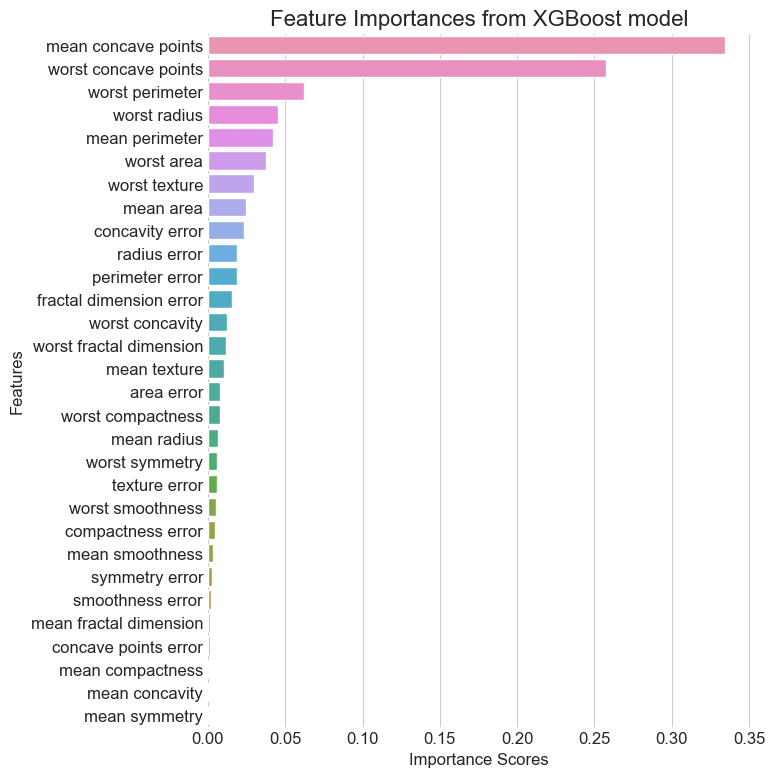

['mean symmetry', 'mean concavity', 'mean compactness', 'concave points error', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'mean smoothness', 'compactness error', 'worst smoothness', 'texture error', 'worst symmetry', 'mean radius', 'worst compactness', 'area error', 'mean texture', 'worst fractal dimension', 'worst concavity']


,Feature,Importance
8,mean symmetry,0.000000
6,mean concavity,0.000431
5,mean compactness,0.000989
17,concave points error,0.001054
9,mean fractal dimension,0.001653
14,smoothness error,0.001812
18,symmetry error,0.002889
4,mean smoothness,0.003542
15,compactness error,0.004697
24,worst smoothness,0.005156


In [19]:
def fit_xgb_clf(X_train, y_train, X_test, y_test):
    """
    Fits an XGBoost model on the training data and evaluates it on the test data using mean squared error (MSE),
    root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2). It also extracts the feature
    importances.

    Args:
    - X_train (numpy.ndarray): The training data features.
    - y_train (numpy.ndarray): The training data target.
    - X_test (numpy.ndarray): The test data features.
    - y_test (numpy.ndarray): The test data target.

    Returns:
    - None: The function prints the MSE, RMSE, MAE, and R2 values to the console, and plots the feature importances.
    """

    # Instantiate an XGBoost model with default hyperparameters
    xgb_clf = xgb.XGBClassifier()

    # Train the model on the training data
    xgb_clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_clf.predict(X_test)

    # Compute the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the performance metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

    # Extract the feature importances and create a dataframe
    importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_clf.feature_importances_})

    # Sort the features by importance
    importances = importances.sort_values('Importance', ascending=True)


    return xgb_clf, importances

model, importances = fit_xgb_clf(X_train, y_train, X_test, y_test)

# eval_classif(model,X_train, X_test, y_test)

plot_importances(importances, 'Feature Importances from XGBoost model')

new_importances = importances[0:18]
selected_features = new_importances.Feature.to_list()

print(selected_features)

# Filter X fro selected features
X_train_xgb = X_train[selected_features]
X_test_xgb = X_test[selected_features]

new_importances

Accuracy: 0.9707602339181286
Precision: 0.9813084112149533
Recall: 0.9722222222222222
F1-score: 0.9767441860465117


C:\Users\hjurz\AppData\Local\Temp\ipykernel_26280\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


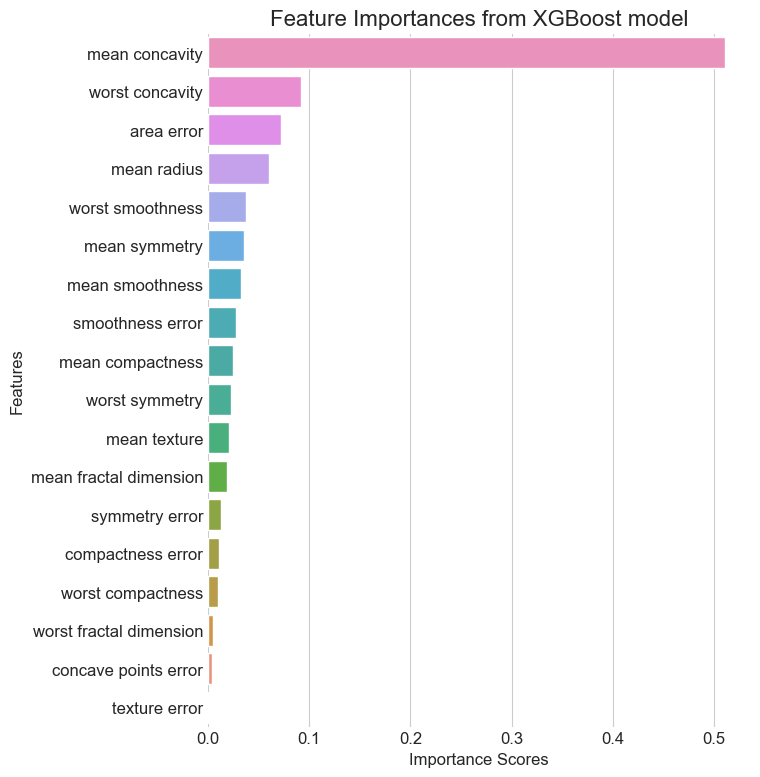

In [20]:
model, importances = fit_xgb_clf(X_train_xgb, y_train, X_test_xgb, y_test)

plot_importances(importances, 'Feature Importances from XGBoost model')